# Passport number exploratory data analysis
I have a set of passport numbers which I need to evaluate in order to suggest appropriate handling of this data serie.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the data from the source txt file

In [2]:
df = pd.read_csv(r"data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10902 entries, 0 to 10901
Data columns (total 1 columns):
PassportNumber    10902 non-null object
dtypes: object(1)
memory usage: 85.3+ KB


We have 10902 records, let's explore what values they contains. 
First we check if there are some duplicates

In [3]:
len(df["PassportNumber"].unique())

10895

There are only 10895 unique numbers, which mean that some of the values are duplicated. For the purpose of this analysis we can remove them.

In [4]:
df = df.drop_duplicates()

## Min and Max, longest and shortest

One lines to see the min and max value

In [5]:
df["PassportNumber"].agg(["min","max"])

min    000000050
max    ZXD244549
Name: PassportNumber, dtype: object

Because the values are strings, the min value is the one with the highest number of leading zeros and the highest is the one with the highest number of leading zeds. We would rather like to know the lenght of the shortest and the longest passports.

In [6]:
# try string sorting for yourself
a = ["0","001","00001","1","123","AB","Z","Z123","ZZ123"]
sorted(a)

['0', '00001', '001', '1', '123', 'AB', 'Z', 'Z123', 'ZZ123']

In order to see the longest and the shortest password, let's look on their lenght

In [7]:
df["PassportNumber"].apply(len).agg(["min","max"])

min     3
max    17
Name: PassportNumber, dtype: int64

Shortest passport has only three characters which looks suspicious and the longest contain 17 characters which also seems a bit too much. Let's add a "len" column into our dataframe to review the distribution and the values.

In [8]:
df['len'] = df["PassportNumber"].apply(len)

Let's have a look on the longest numbers

In [9]:
df[df["len"]==df['len'].max()]

,PassportNumber,len
5688,65361100000000000,17
5910,39598000000000000,17


it looks like that they contain too many trailing zeros. What about the shortest ones. 

In [10]:
df[df["len"]==df['len'].min()]

,PassportNumber,len
893,179,3
10418,917,3
10557,237,3


In [11]:
df[df["len"]>9]

,PassportNumber,len
20,73846290957,11
40,N614226700,10
54,WC76717593,10
443,ZC464204933,11
473,R518348872,10
...,...,...
10234,0055123691,10
10334,XW66811820,10
10714,D759875000,10
10752,ZU28646829,10


what is the distribution of the passport number length? 

In [12]:
counts_by_value = df["len"].value_counts().reset_index()
separator = pd.Series(["|"]*df["len"].value_counts().shape[0])
separator.name = "|"
counts_by_index = df["len"].value_counts().sort_index().reset_index()

pd.concat([counts_by_value, separator, counts_by_index], axis=1)

,index,len,|,index,len
0,7,4519,|,3,3
1,8,2709,|,4,21
2,9,2552,|,5,80
3,12,486,|,6,305
4,6,305,|,7,4519
5,10,144,|,8,2709
6,5,80,|,9,2552
7,11,66,|,10,144
8,4,21,|,11,66
9,15,5,|,12,486


In [13]:
[i for i in range(df["len"].max()+1)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

Let's plot it

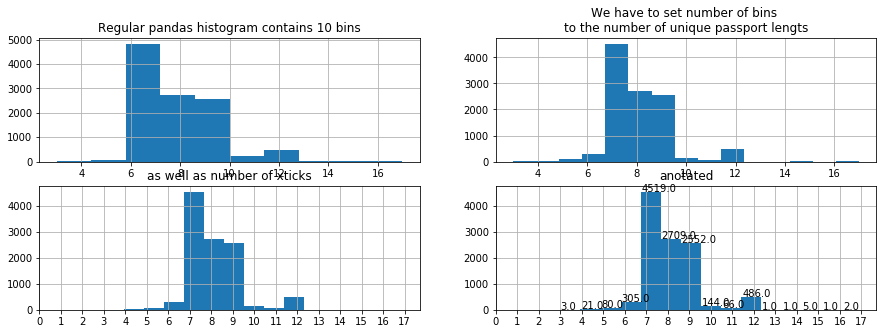

In [14]:
fig, ax = plt.subplots(2,2, figsize=(15,5))

# number of bins not specified
df["len"].hist(ax=ax[0,0])
ax[0,0].set_title("Regular pandas histogram contains 10 bins")

# number of bins equal to the number of values
df["len"].hist(bins=len(df["len"].unique()), ax=ax[0,1])
ax[0,1].set_title("We have to set number of bins \nto the number of unique passport lengts")

# same as previous, but the xticks also match the values
df["len"].hist(bins=len(df["len"].unique()), ax=ax[1,0])
ax[1,0].set_title("as well as number of xticks")
ax[1,0].set_xticks(range(df["len"].max()+1))


df["len"].hist(bins=len(df["len"].unique()), ax=ax[1,1])
ax[1,1].set_title("anotated")
ax[1,1].set_xticks(range(df["len"].max()+1))
for p in ax[1,1].patches:
    ax[1,1].annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

maybe it's the easiest to plot the bar charts rather then the histogram

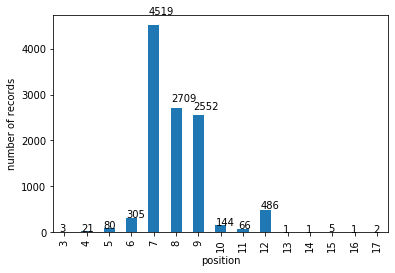

In [15]:
ax = df["len"].value_counts().sort_index().plot(kind="bar")
ax.set_xlabel("position")
ax.set_ylabel("number of records")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.05))

The most passport numbers has 7 characters, usual is also 8 and 9 and some have 12. Different number of characters is quite unique. 

## Leading and trailing zeroes
We have seen that the longest passport contain quite many trailing zeros. Let's explore the distribution of the leading and the trailing zeros. 

In [16]:
# number of leading zeros can be calculated by subtracting the length of the string l-stripped off the leading zeros from the total length of the string
df["leading_zeros"] = df["PassportNumber"].apply(lambda x: len(x) - len(x.lstrip("0")))

In [17]:
# similarly the number of the trailing zeros can be calculated by subtracting the length of the string r-stripped off the leading zeros from the total length of the string
df["trailing_zeros"] = df["PassportNumber"].apply(lambda x: len(x) - len(x.rstrip("0")))

Zeros are valid part of the passport pattern. They can definitely appear at the end, but I haven't been able to confirm if the passport number can start with zero. Let's assume it cannot. According to ICAO standard the passport number cannot exceed 9 characters. Let's check if all the passport longer than 9 characters contain only zeros

In [18]:
df[df["len"]>9]

,PassportNumber,len,leading_zeros,trailing_zeros
20,73846290957,11,0,0
40,N614226700,10,0,2
54,WC76717593,10,0,0
443,ZC464204933,11,0,0
473,R518348872,10,0,0
...,...,...,...,...
10234,0055123691,10,2,0
10334,XW66811820,10,0,1
10714,D759875000,10,0,3
10752,ZU28646829,10,0,0


With simply displaying few passport over 9 characters we see, that they don't only contain zeros at the end. So what is the distribution of the zeros? To look at it we will do an overview how often a zero appears at each position and when there's a different character. 

In [19]:
passports_list = []
# for each passport number
for passport_number in df["PassportNumber"]:
    # let's create a dictionary with the passport number
    pos = {"PassportNumber": passport_number}
    # and let's add to each position if it's a zero or not
    for i, c in enumerate(passport_number):      
        # and for each position check if it's 0 -> 1 (true) or something else --> 0 (false)
        pos[i+1] = True if c == "0" else False
    passports_list.append(pos)

In [20]:
def highlight_true(val):
    return 'background-color: yellow' if val == 1 else ''

In [21]:
zeros_distribution = pd.DataFrame(passports_list)
zeros_distribution["len"] = zeros_distribution["PassportNumber"].apply(len)
zeros_distribution.sample(5).style.applymap(highlight_true, subset=list(range(1,18)))

,PassportNumber,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,len
6554,45798,False,False,False,False,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,5
10820,0850214,True,False,False,True,False,False,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,7
1413,X3841020,False,False,False,False,False,True,False,True,nan,nan,nan,nan,nan,nan,nan,nan,nan,8
8436,6665442,False,False,False,False,False,False,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,7
4856,0308453,True,False,True,False,False,False,False,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,7


The dataset above contains 1 for every position when there's zero and 0 (false) if there's a different character. N/A appears in case, the passport number doesn't contain any character on that position. 

In [22]:
zero_count = zeros_distribution[range(1,18)].sum()
zero_count.name = "is_zero"
position_filled_count = zeros_distribution[range(1,18)].count()
position_filled_count.name = "is_filled"
zeros_distribution_df = pd.concat([zero_count,position_filled_count], axis=1)
zeros_distribution_df["is_not_zero"] = zeros_distribution_df["is_filled"]-zeros_distribution_df["is_zero"]
zeros_distribution_df["perc"] = zeros_distribution_df["is_zero"]/zeros_distribution_df["is_filled"]
zeros_distribution_df

,is_zero,is_filled,is_not_zero,perc
1,732.0,10895,10163.0,0.067187
2,1108.0,10895,9787.0,0.101698
3,1001.0,10895,9894.0,0.091877
4,1007.0,10892,9885.0,0.092453
5,1126.0,10871,9745.0,0.103578
6,1146.0,10791,9645.0,0.106200
7,1419.0,10486,9067.0,0.135323
8,844.0,5967,5123.0,0.141445
9,551.0,3258,2707.0,0.169122
10,101.0,706,605.0,0.143059


That's do that information we can easily count zero at each position using .sum() (remember that 1 appears in case there's a zero in the passport number otherwise there's 0), total number of passport which have this position filled in by .count() (N/A are not counted). This information can easily be plotted.

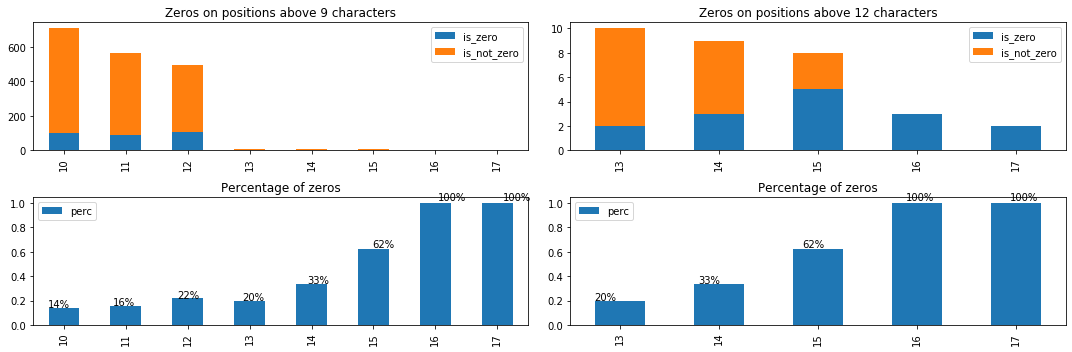

In [23]:
fig, ax = plt.subplots(2,2, figsize=(15,5))
zeros_distribution_df.loc[zeros_distribution_df.index>9,["is_zero","is_not_zero"]].plot(kind='bar', stacked=True, ax=ax[0,0])
ax[0,0].set_title("Zeros on positions above 9 characters")
zeros_distribution_df.loc[zeros_distribution_df.index>12,["is_zero","is_not_zero"]].plot(kind='bar', stacked=True, ax=ax[0,1])
ax[0,1].set_title("Zeros on positions above 12 characters")
zeros_distribution_df.loc[zeros_distribution_df.index>9,["perc"]].plot(kind='bar', ax=ax[1,0])
ax[1,0].set_title("Percentage of zeros")
for p in ax[1,0].patches:
    ax[1,0].annotate("{:.0%}".format(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.02))
zeros_distribution_df.loc[zeros_distribution_df.index>12,["perc"]].plot(kind='bar', stacked=True, ax=ax[1,1])
ax[1,1].set_title("Percentage of zeros")
for p in ax[1,1].patches:
    ax[1,1].annotate("{:.0%}".format(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.02))
plt.tight_layout()
plt.show()

We see that except for positions 16 and 17, there are mostly different characters than zeros. It can howerver mean that we have combination of leading and trailing zeros both. To check it, let's remove the zeros on both ends using .strip("0")

In [24]:
df["len_without_zeros"] = df["PassportNumber"].str.strip("0").apply(len)

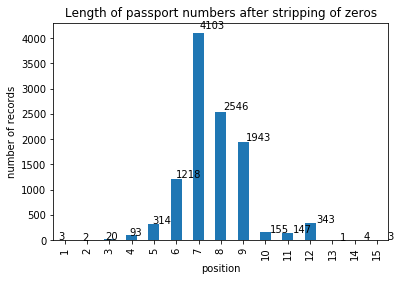

In [25]:
ax = df["len_without_zeros"].value_counts().sort_index().plot(kind="bar")
ax.set_xlabel("position")
ax.set_ylabel("number of records")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.02))
plt.title("Length of passport numbers after stripping of zeros")
plt.show()

Yes. Even the passports which are stripped from the leading and trainling zeros are longer than 9 characters. 

## Letters in the passport numbers
To review string patterns it is helpful to use the power of the regular expression. Even though their syntax is a bit cumbersome, once correctly used, they can be very quick and efficient

In [26]:
import re

Let's first explore how many passport numbers **start with a letter**. 

In [27]:
df["starts_with_letter"] = df["PassportNumber"].apply(lambda x: True if re.match("^[a-zA-Z]+.*", x) else False)

In [28]:
start_with_letter_count = df["starts_with_letter"].value_counts()
pd.DataFrame({"count": start_with_letter_count,
             "percentage": start_with_letter_count/df.shape[0]}).style.format("{:.2%}", subset=["percentage"])

,count,percentage
True,6415,58.88%
False,4480,41.12%


Are the letters only at the beginning or also in the middle (after a number)? To check this, let's apply a regex:
* `^` at the beginning
* `.` is something (letter, number or a character)
* `*` zero or more times
* `\d` then a number
* `+` once or more times
* `[a-zA-Z]` then a letter in lower or capital case
* `+` once or more times

In [29]:
df["letter_after_number"] = df["PassportNumber"].apply(lambda x: "Letter after number" if re.match("^.*\d+[a-zA-Z]+", x) else "Trailing numbers only")

In [30]:
letter_after_number_count = df["letter_after_number"].value_counts()
pd.DataFrame({"count": letter_after_number_count,
             "percentage": letter_after_number_count/df.shape[0]}).style.format("{:.2%}", subset=["percentage"])

,count,percentage
Trailing numbers only,10016,91.93%
Letter after number,879,8.07%


In [31]:
### How many letters appear at the beginning

In [32]:
def lenght_of_start_letter_sequence(string):
    # re.match returns None in case no match is found, and applying of .group(0) would lead to an error
    if re.match("^[a-zA-Z]+", string) is not None:
        return len(re.match("^[a-zA-Z]+", string).group(0))
    else:
        return 0

In [33]:
df["lenght_of_start_letters"] = df["PassportNumber"].apply(lenght_of_start_letter_sequence)

In [34]:
df.sort_values(by="lenght_of_start_letters", ascending=False).loc[df["lenght_of_start_letters"]>0,["PassportNumber","lenght_of_start_letters"]]

,PassportNumber,lenght_of_start_letters
6402,TVNDTT166,6
2119,DPJA04750,4
5864,ASFS15940,4
8870,MSDM64574,4
8883,HEYF30806,4
...,...,...
3412,T322281,1
1536,B0725650,1
3414,W29G28145,1
2007,J0701092,1


In [35]:
df[df["lenght_of_start_letters"]==3]["PassportNumber"].sample(5).to_list()

['ZIE196477', 'UQV963919', 'HPI965110', 'AJW724767', 'UZY040851']

## Common prefix

There's a chance that the data supplier has added a prefix to the values, which was not originally included in the passport number. For most purposes, such a prefix must be removed. But how to find it? Let's first assume, that our prefix would have 3 characters

In [36]:
df["PassportNumber"].str.slice(stop=3).value_counts()

000    41
009    37
005    33
932    29
007    24
       ..
OD0     1
VK4     1
A99     1
I09     1
N6P     1
Name: PassportNumber, Length: 4734, dtype: int64

In [37]:
# what is average occurance of the 3 character prefix
df["PassportNumber"].str.slice(stop=3).value_counts().mean()

2.3014364174059994

In [38]:
c = df[["PassportNumber", "len"]]
c["prefix"] = c["PassportNumber"].str.slice(stop=3)

# group by both prefix and the full length of the passport
prefix_by_length_df = c.groupby(["prefix", "len"]).size().reset_index()

# review if there are some prefixes appearing more often
prefix_by_length_df[prefix_by_length_df["len"]==12].sort_values(by=0, ascending=False)

C:\Users\v.dekanovsky\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,prefix,len,0
2221,932,12,27
2245,943,12,4
1518,627,12,3
1964,825,12,3
2273,956,12,3
...,...,...,...
921,370,12,1
905,363,12,1
903,362,12,1
890,357,12,1


In [39]:
prefix_by_length_df[prefix_by_length_df["len"]==12][0].mean()

1.3278688524590163

## Randomize the passports
If you have sensitive data, but you need to share them with a data scientist, most clients would agree to share the anonymized data or randomized sample. In our case, let's try simple randomization, which: 
* Keeps leading and trailing zeros
* Change any number for a random number
* Change any letter for a random letter

In [40]:
import random
import string

In [41]:
def passport_randomizer(list_of_passports):
    processed = {} # dictionaly which will keep the {"old": "new value"}
    for p in list_of_passports:
        leading_zeros_up_to = len(p) - len(p.lstrip("0"))
        trailing_zeros_up_to = len(p) - (len(p) - len(p.rstrip("0")))
        out = []
        for i, c in enumerate(p):
            # keep the leading and trailing zeros intact
            if i < leading_zeros_up_to or i >= trailing_zeros_up_to:
                out.append(c)
            # then change any number to a random number
            elif c.isnumeric():
                out.append(str(random.randint(0,9)))
            # finally the rest for a random letter
            else:
                out.append(random.choice(string.ascii_letters).upper())
        processed[p] = "".join(out)
    return processed

Let's first try on a short sample

In [42]:
p_test = pd.DataFrame(["0012300","ABC","00EFG","IJK00","012DF340"])
passport_randomizer(p_test[0])

{'0012300': '0034600',
 'ABC': 'LIO',
 '00EFG': '00FZA',
 'IJK00': 'VDT00',
 '012DF340': '017MA270'}

The function seems to meet all our criteria, so let's randomize the whole passport set:

In [43]:
from itertools import islice
processed = passport_randomizer(df["PassportNumber"].unique())
dict(islice(processed.items(), 5))  

{'B5649076': 'P5868159',
 '0022730': '0004420',
 'O528485': 'A054277',
 '3150943': '5799754',
 'L1114025': 'T0956134'}

In the original dataFrame some passports were duplicated, so we will `randomize` only the `unique()` values so that we don't randomize one value into two different ones. Then we can `map` the old values to the new ones in a single step and save as a new_data.csv. 

In [44]:
df["PassportNumber"].map(processed).to_csv(r"new_data.csv", index=False, header=True)

This method still have some drawbacks, because the strict randomization disolves possible common prefix.

# Conclusion

In this notebook we have reviewed several methods how to analyze a list of **alpha-numeric** strings to:
* count the length of the string
* count the leading and trailing zeros
* occurrence of a specific character (zero) at a specific position 
* review how many start with a letter
* review how many has a letter in the middle
* analyzed if there's a common prefix
* randomized the dataset